# TODO
- Exploit temperature data
- Explore more usable data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from config import *

In [2]:
df_pollen = pd.read_csv("data/boreal_forest/"+CHARCOAL_ID+"_spec.csv")
df_pollen = df_pollen.rename(columns={"Profondeur": "Depth"}).sort_values(by="Depth", ascending=False)
df_pollen.columns = df_pollen.columns.str.strip()
df_pollen = df_pollen[[c for c in df_pollen.columns if c not in DISCARD_POLLEN]]
display(df_pollen)

,Depth,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,...,Ulmus,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics
61,1180,0.313152,1.878914,39.144050,38.830898,0.313152,6.889353,0.000000,0.313152,1.878914,...,0.626305,0.313152,1.565762,0.626305,0.313152,0.939457,0.313152,2.505219,1.252610,0.313152
60,1170,0.595238,1.785714,17.559524,54.166667,0.000000,10.119048,0.297619,0.595238,1.190476,...,2.380952,1.190476,0.595238,0.000000,1.488095,0.892857,0.000000,3.273810,0.297619,0.297619
59,1160,1.863354,0.621118,10.559006,57.142857,0.310559,12.422360,0.000000,0.000000,0.931677,...,0.000000,3.726708,2.795031,0.000000,2.173913,0.621118,0.310559,3.416149,0.000000,0.000000
58,1150,0.568182,1.136364,13.068182,51.704545,0.000000,15.909091,0.000000,0.284091,0.852273,...,3.125000,0.568182,2.556818,0.000000,1.420455,0.568182,0.568182,5.681818,0.284091,0.284091
57,1140,0.307062,2.456499,25.793245,31.320368,0.307062,21.494371,0.307062,0.307062,2.456499,...,2.149437,1.535312,2.763562,0.000000,0.307062,0.614125,0.307062,3.991812,1.535312,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,610,0.000000,1.744186,16.694352,55.315615,0.996678,9.219269,0.498339,0.249169,0.996678,...,0.498339,0.249169,0.996678,0.000000,0.249169,0.747508,0.498339,4.235880,0.000000,0.000000
3,600,0.264085,2.640845,12.147887,52.816901,5.545775,13.204225,0.000000,0.264085,1.848592,...,0.000000,0.000000,2.112676,0.000000,0.792254,0.792254,0.528169,1.584507,0.000000,0.000000
2,590,0.840336,1.680672,14.005602,59.383753,0.560224,9.523810,0.280112,0.560224,1.120448,...,0.560224,0.560224,1.960784,0.840336,0.280112,0.840336,0.280112,1.400560,0.280112,0.000000
1,580,0.302115,0.604230,13.897281,62.235650,0.604230,10.574018,0.000000,0.604230,0.604230,...,0.000000,1.510574,0.906344,1.208459,0.000000,1.208459,0.000000,1.208459,0.000000,0.000000


In [3]:
df_synth = pd.read_csv("tmp/df_synth.csv")
display(df_synth)

,Depth,Synth_0
0,570,8.245924
1,580,7.921784
2,590,8.327267
3,600,7.616762
4,610,8.624641
...,...,...
57,1140,7.980267
58,1150,7.573520
59,1160,6.121886
60,1170,5.276528


In [4]:
df_pollen = pd.merge(df_pollen,df_synth,on="Depth")
display(df_pollen)

,Depth,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,...,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics,Synth_0
0,1180,0.313152,1.878914,39.144050,38.830898,0.313152,6.889353,0.000000,0.313152,1.878914,...,0.313152,1.565762,0.626305,0.313152,0.939457,0.313152,2.505219,1.252610,0.313152,10.000000
1,1170,0.595238,1.785714,17.559524,54.166667,0.000000,10.119048,0.297619,0.595238,1.190476,...,1.190476,0.595238,0.000000,1.488095,0.892857,0.000000,3.273810,0.297619,0.297619,5.276528
2,1160,1.863354,0.621118,10.559006,57.142857,0.310559,12.422360,0.000000,0.000000,0.931677,...,3.726708,2.795031,0.000000,2.173913,0.621118,0.310559,3.416149,0.000000,0.000000,6.121886
3,1150,0.568182,1.136364,13.068182,51.704545,0.000000,15.909091,0.000000,0.284091,0.852273,...,0.568182,2.556818,0.000000,1.420455,0.568182,0.568182,5.681818,0.284091,0.284091,7.573520
4,1140,0.307062,2.456499,25.793245,31.320368,0.307062,21.494371,0.307062,0.307062,2.456499,...,1.535312,2.763562,0.000000,0.307062,0.614125,0.307062,3.991812,1.535312,0.000000,7.980267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,610,0.000000,1.744186,16.694352,55.315615,0.996678,9.219269,0.498339,0.249169,0.996678,...,0.249169,0.996678,0.000000,0.249169,0.747508,0.498339,4.235880,0.000000,0.000000,8.624641
58,600,0.264085,2.640845,12.147887,52.816901,5.545775,13.204225,0.000000,0.264085,1.848592,...,0.000000,2.112676,0.000000,0.792254,0.792254,0.528169,1.584507,0.000000,0.000000,7.616762
59,590,0.840336,1.680672,14.005602,59.383753,0.560224,9.523810,0.280112,0.560224,1.120448,...,0.560224,1.960784,0.840336,0.280112,0.840336,0.280112,1.400560,0.280112,0.000000,8.327267
60,580,0.302115,0.604230,13.897281,62.235650,0.604230,10.574018,0.000000,0.604230,0.604230,...,1.510574,0.906344,1.208459,0.000000,1.208459,0.000000,1.208459,0.000000,0.000000,7.921784


c:\Users\Tony\AppData\Local\anaconda3\envs\hap2-project\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,Salix,...,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics,Synth_0
1,-0.290656,0.085200,3.322394,-1.147805,0.079194,-0.459298,-0.534331,-0.161416,0.265832,-0.452381,...,-0.345916,0.451697,0.443006,-0.656911,0.036638,0.338554,-0.208877,1.000000,0.025086,3.975231
2,-1.306646,1.064635,1.077553,-0.222753,-0.078538,-0.327556,0.534331,0.340608,0.099932,0.452381,...,-1.000000,-1.023818,0.000000,-0.383441,0.213649,-0.335750,-0.038683,0.311646,0.480655,-0.711446
3,1.334524,-0.471020,-0.386224,0.407030,0.078538,-0.495852,0.000000,-0.162563,0.030661,0.000000,...,1.245362,0.110868,0.000000,0.421259,0.041620,-0.278520,-0.615732,-0.297480,-0.458807,-1.221682
4,0.269053,-1.206824,-1.958703,1.525653,-0.077654,-0.794288,-0.551285,-0.013145,-0.619452,-0.466735,...,-0.381326,-0.096222,0.000000,0.622498,-0.036122,0.282300,0.459287,-1.310192,0.458807,-0.342314
5,0.316392,1.964079,2.547917,-1.620921,-0.000239,0.034387,0.551285,0.175708,0.591746,-0.469610,...,0.241022,0.139390,-0.871458,-0.517151,-0.243652,-1.000000,0.498896,1.285148,0.000000,0.342671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.000000,-0.832671,-1.030427,0.059539,0.731421,0.585065,-0.894693,0.334272,-0.063073,-0.378738,...,0.230327,0.441105,0.785926,0.171301,0.504271,0.061858,-0.622735,0.000000,0.000000,-0.645182
58,-0.272108,-0.819696,0.699814,0.187016,-1.150437,-0.566705,0.894693,-0.008535,-0.328956,-0.022671,...,0.098244,-0.519403,0.000000,-0.303638,-0.035180,-0.032250,0.720554,0.000000,0.000000,0.848222
59,-0.593760,0.877758,-0.285948,-0.491496,1.260813,0.523396,-0.502899,-0.169458,0.281163,0.401408,...,-0.220888,0.070693,-0.594398,0.286338,-0.037804,0.268178,0.049991,-0.293314,0.000000,-0.597955
60,0.554574,0.984048,0.016673,-0.213450,-0.011129,-0.149351,0.502899,-0.025181,0.199331,0.000000,...,-0.374709,0.490753,-0.260386,0.156611,-0.289429,0.302834,0.052207,0.293314,0.000000,0.341251


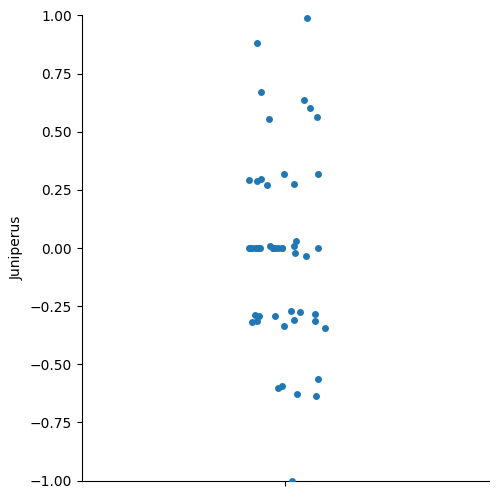

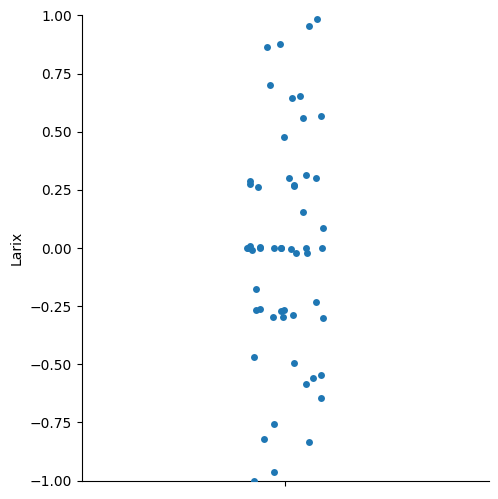

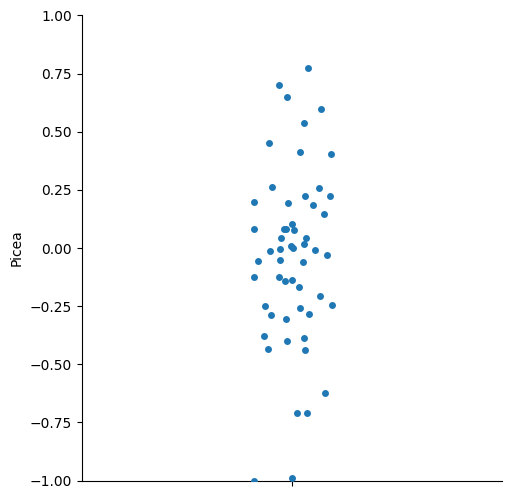

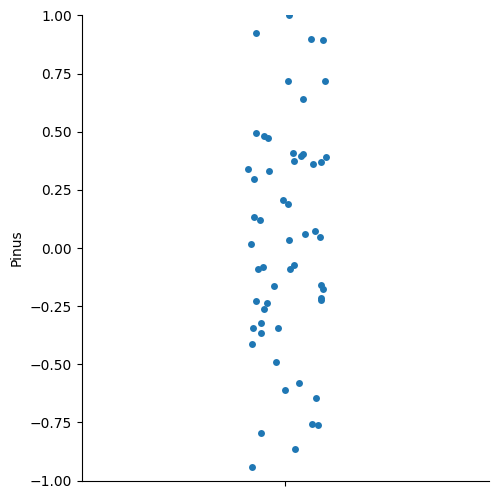

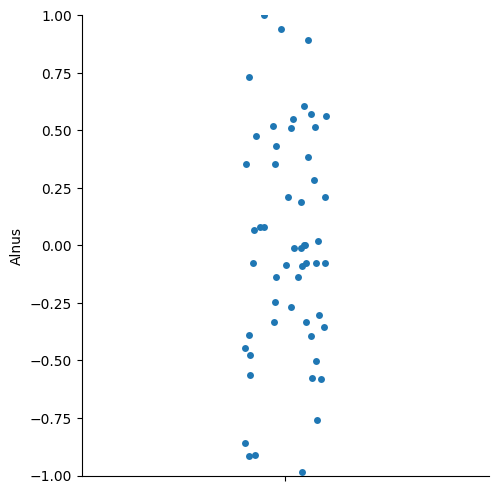

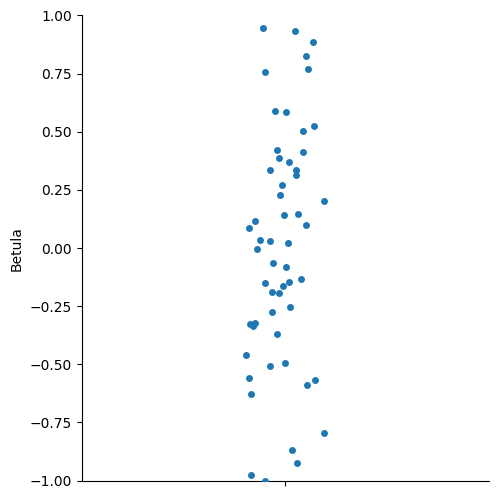

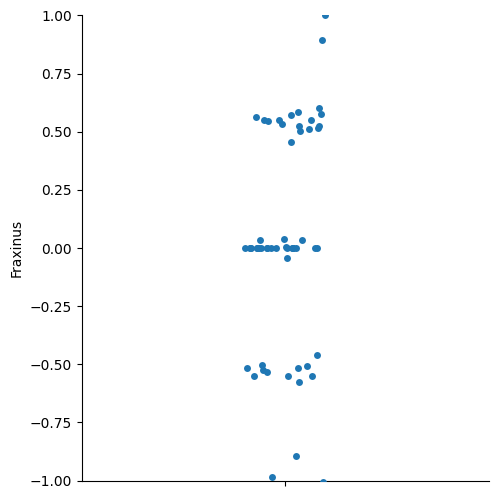

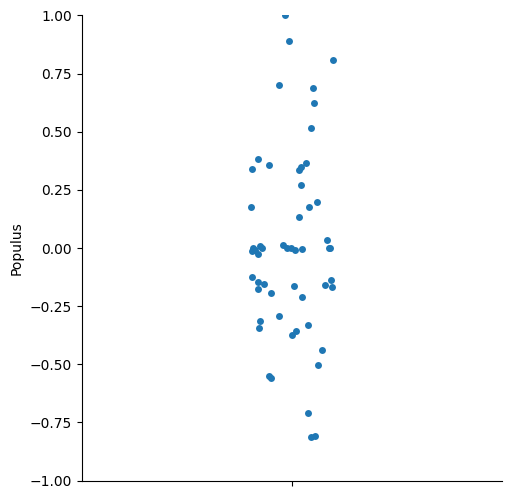

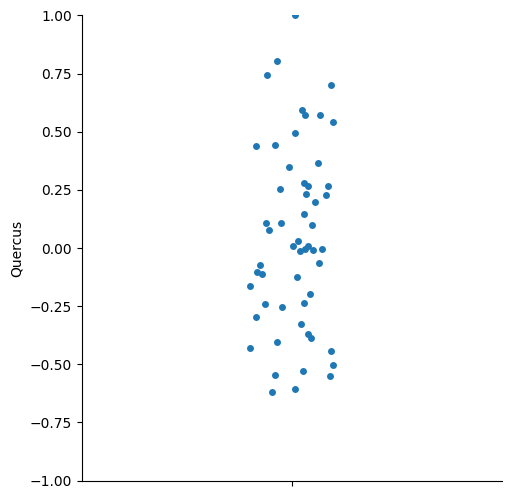

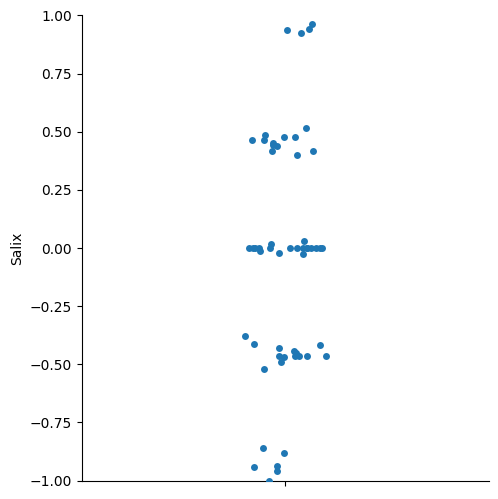

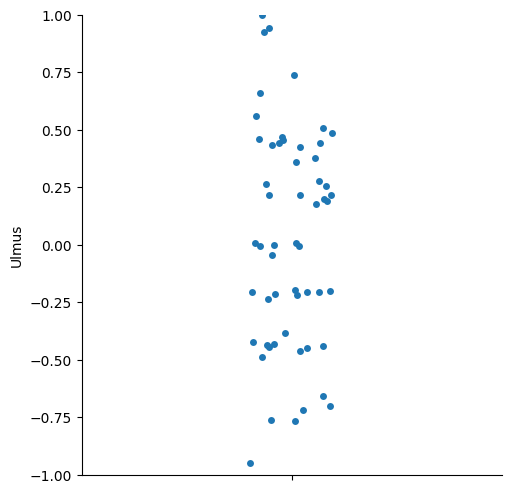

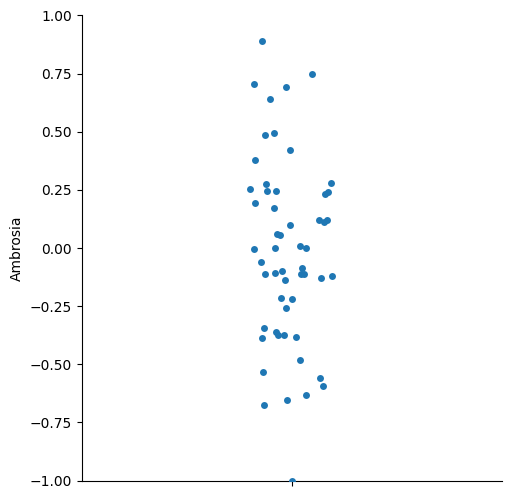

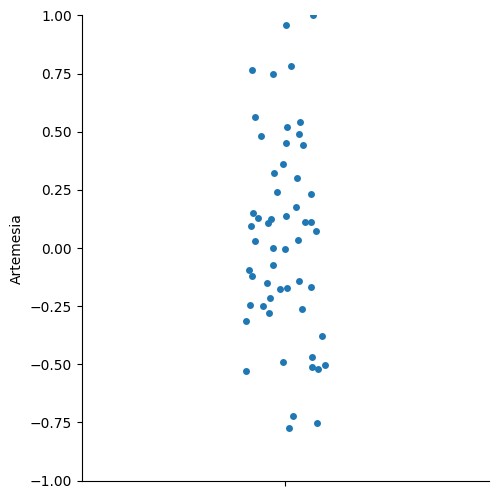

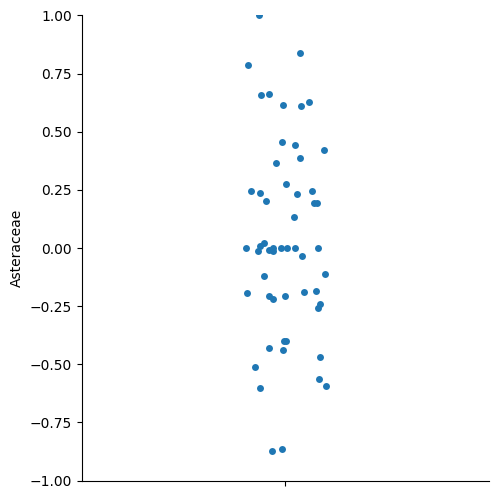

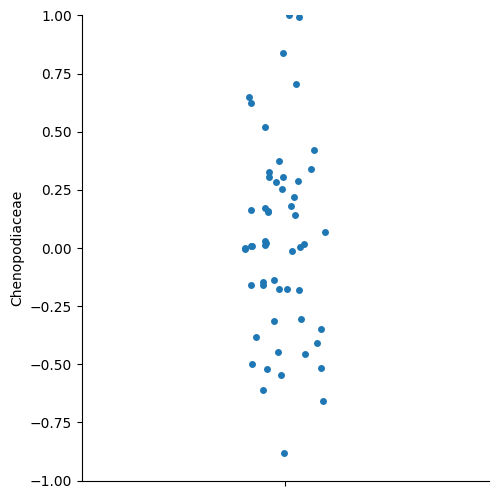

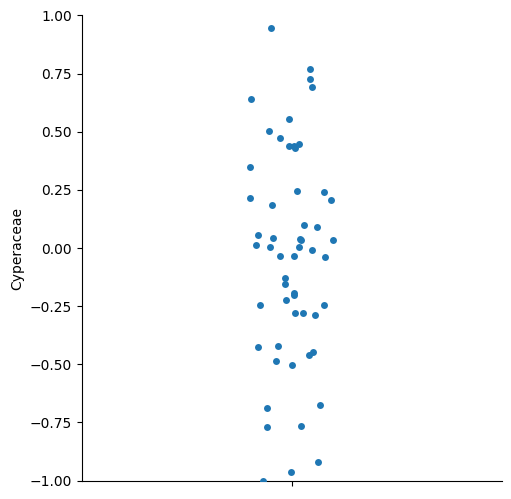

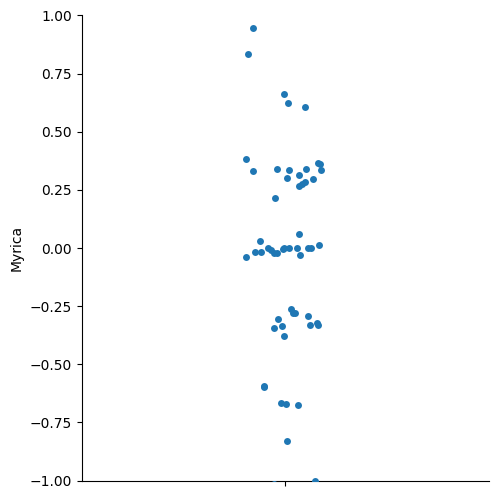

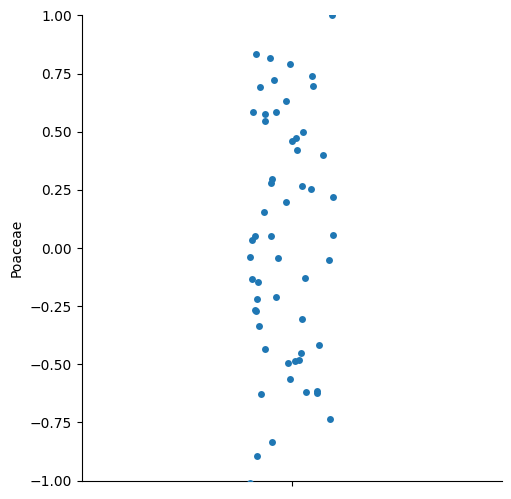

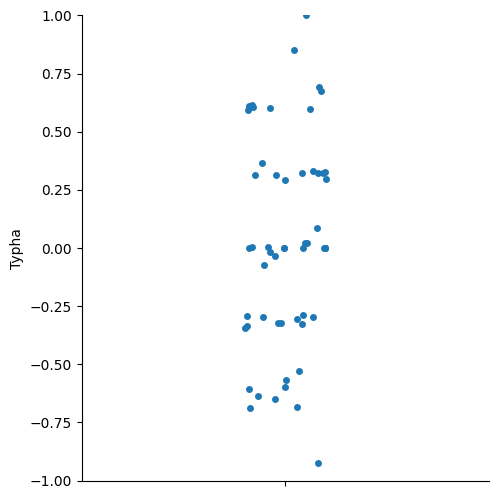

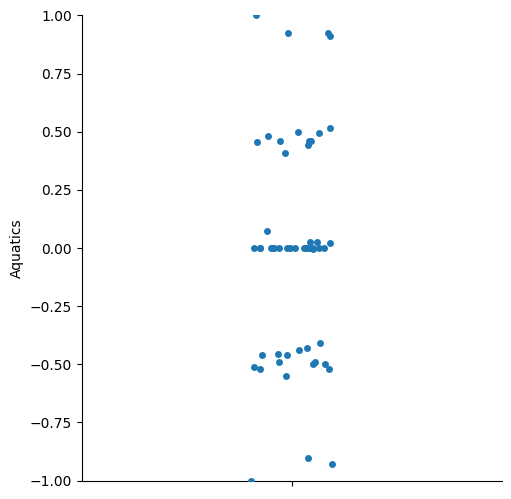

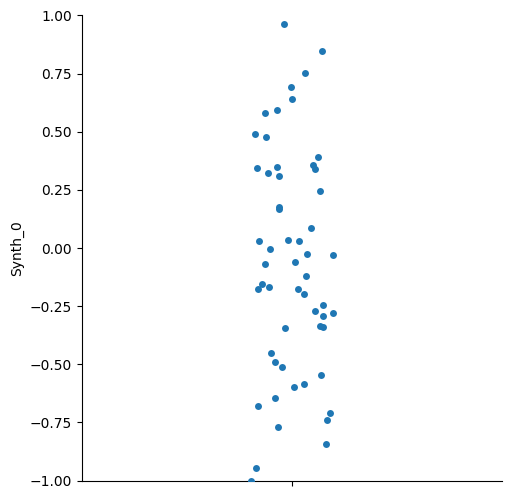

In [5]:
# Clean usable columns
df = df_pollen.drop(columns=["Depth"])

# Remove space from col name
df.columns = df.columns.str.replace(' ', '_')


for col in df.columns:
    df[col+"_prev"] = df[col].shift()
    df[col] = df[col+"_prev"] - df[col]
    #df = df.drop(columns=TARGET)
    df[col] = df[col] / df[col].abs().quantile(0.9)
    g = sns.catplot(data=df, y=col)
    g.set(ylim=(-1, 1))
    df = df.drop(columns=col+"_prev")


# Compute change of charcoal
#df["charcoal_change"] = df[CHARCOAL_ID].shift()
#df["charcoal_change"] = df["charcoal_change"] - df[CHARCOAL_ID]

#df = df[(df["charcoal_change"] > -1) & (df["charcoal_change"] < 1)]
#sns.catplot(data=df, y="charcoal_change")

#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: "up" if x > 0 else "down")
#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: x > 0)
#df = df.drop(axis=1, columns=CHARCOAL_ID)
df = df.dropna()

display(df)

df.to_csv(PROCESSED_DATA_PATH, index=False)

# Analysis

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

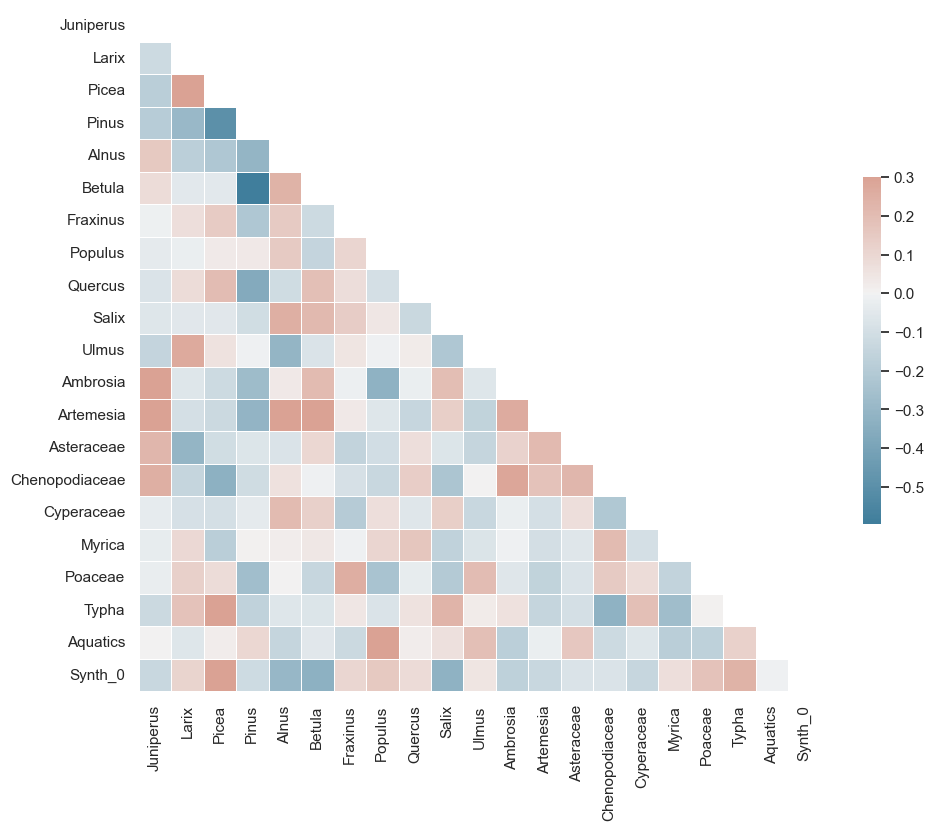

In [7]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.select_dtypes(include=["number"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Discretisation

In [8]:
DISCRETE_ENCODING_PATH = "tmp/discrete_encoding.csv"
DISCRETE_DATA_PATH = "tmp/data_discrete.csv"
MAX_VALUES = 2
RANDOM_SEED = 0
PRECISION = 3

In [9]:
import numpy
from sklearn import mixture

def encode_quantity(x, tresholds):
    if numpy.isnan(x):
        return numpy.nan
    level = 0
    for i in tresholds:
        if i > x:
            return level
        level += 1
    return level

for i in [-0.5,0,0.5]:
    print(i, encode_quantity(i,DISCRETIZATION_TRESHOLDS))

def encode_tendancy(x, tresholds):
    if numpy.isnan(x):
        return numpy.nan
    level = 0
    for i in tresholds:
        if i > x:
            return level
        level += 1
    return level

for i in [-0.5,0,0.5]:
    print(i, encode_tendancy(i,DISCRETIZATION_TRESHOLDS))

-0.5 0
0 1
0.5 1
-0.5 0
0 1
0.5 1


In [10]:
import warnings

df_tmp = df.copy()

discretization = {}

categorical_cols = [i for i in list(df_tmp.select_dtypes(exclude=["number"]).columns)]# + ["charcoal_change"]

display(categorical_cols)

non_categorical_cols = [c for c in df_tmp.columns if c not in categorical_cols]

print("Computing discrete levels for",len(non_categorical_cols),"variables...")
for idx, col in enumerate(non_categorical_cols):
    print("\r",idx+1,"/",len(non_categorical_cols),end="")
    discretization[col] = DISCRETIZATION_TRESHOLDS

#discretization[TARGET+"_prev"] = [df_tmp[TARGET+"_prev"].quantile(0.25),df_tmp[TARGET+"_prev"].quantile(0.75)]

print()

df_encoding = pd.DataFrame(list(discretization.items()), columns=["Variable","Thresholds"])
df_encoding.to_csv(DISCRETE_ENCODING_PATH, index=False)
display(df_encoding)

print("Encoding data")
dataset_cat_col = [i for i in categorical_cols if i in df_tmp.columns]
df_discretised = df_tmp[dataset_cat_col].copy()
for idx, col in enumerate(non_categorical_cols):
    if col in df_tmp.columns:
        df_discretised[col] = df_tmp[col].apply(lambda x: encode_tendancy(x, discretization[col])).astype('Int64')

#df_discretised[TARGET+"_prev"] = df_tmp[TARGET+"_prev"].apply(lambda x: encode_quantity(x, discretization[TARGET+"_prev"])).astype('Int64')

display(df_discretised)
df_discretised.to_csv(DISCRETE_DATA_PATH, index=False)
print("Saved to",DISCRETE_DATA_PATH)

[]

Computing discrete levels for 21 variables...
 21 / 21


,Variable,Thresholds
0,Juniperus,[0]
1,Larix,[0]
2,Picea,[0]
3,Pinus,[0]
4,Alnus,[0]
5,Betula,[0]
6,Fraxinus,[0]
7,Populus,[0]
8,Quercus,[0]
9,Salix,[0]


Encoding data


,Juniperus,Larix,Picea,Pinus,Alnus,Betula,Fraxinus,Populus,Quercus,Salix,...,Ambrosia,Artemesia,Asteraceae,Chenopodiaceae,Cyperaceae,Myrica,Poaceae,Typha,Aquatics,Synth_0
1,0,1,1,0,1,0,0,0,1,0,...,0,1,1,0,1,1,0,1,1,1
2,0,1,1,0,0,0,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
3,1,0,0,1,1,0,1,0,1,1,...,1,1,1,1,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,0
5,1,1,1,0,0,1,1,1,1,0,...,1,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,0,0,1,1,1,0,1,0,0,...,1,1,1,1,1,1,0,1,1,0
58,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,1,1
59,0,1,0,0,1,1,0,0,1,1,...,0,1,0,1,0,1,1,0,1,0
60,1,1,1,0,0,0,1,0,1,1,...,0,1,0,1,0,1,1,1,1,1


Saved to tmp/data_discrete.csv


c:\Users\Tony\AppData\Local\anaconda3\envs\hap2-project\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


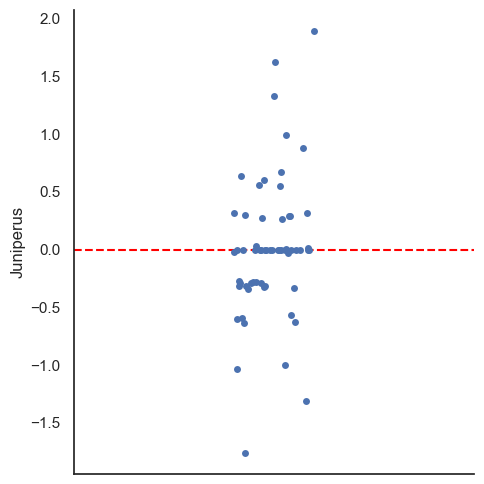

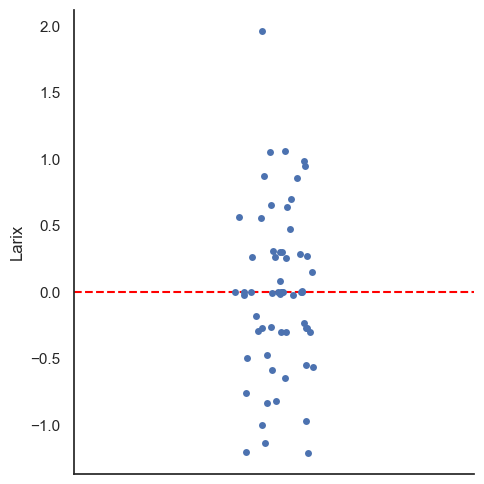

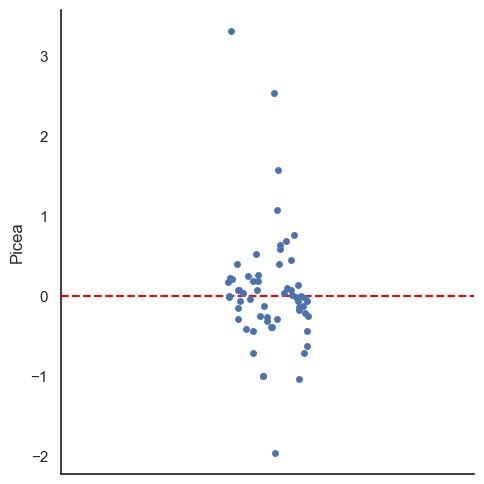

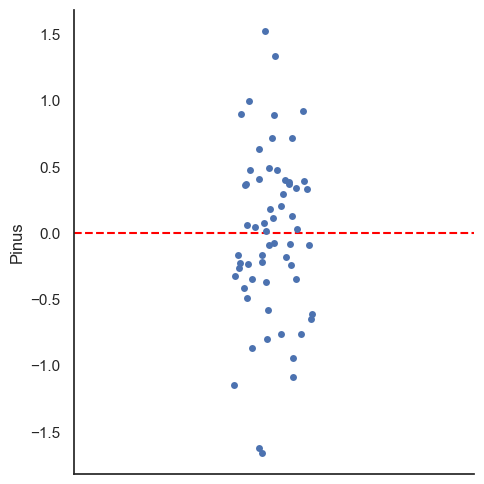

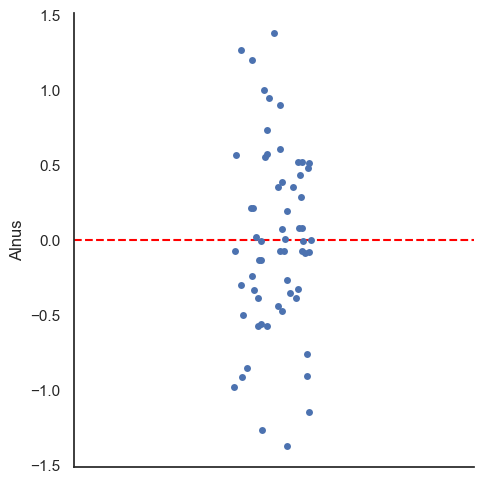

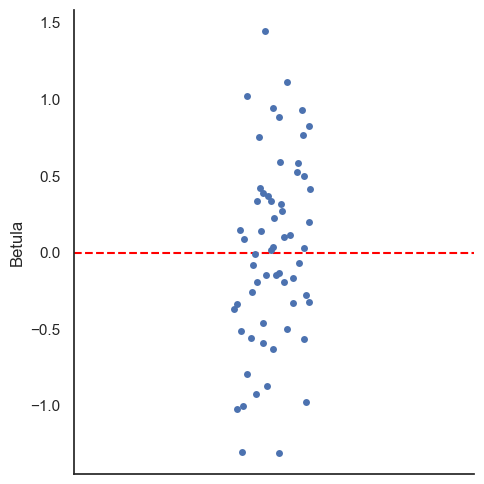

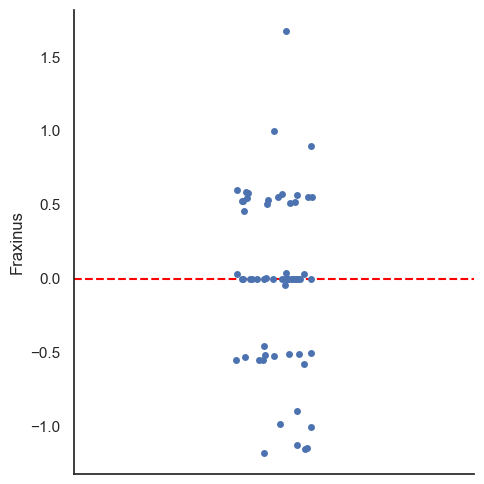

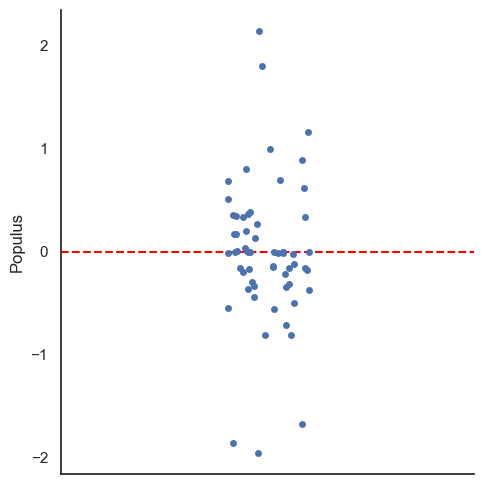

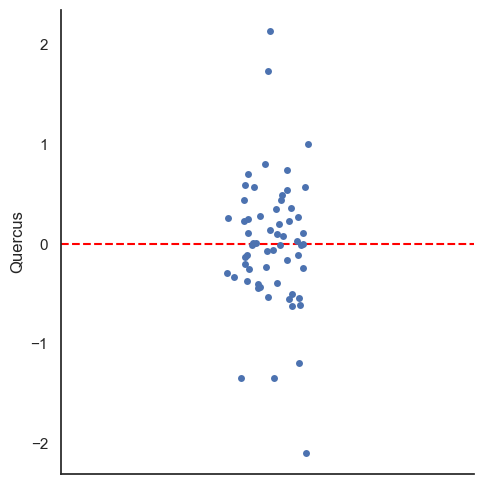

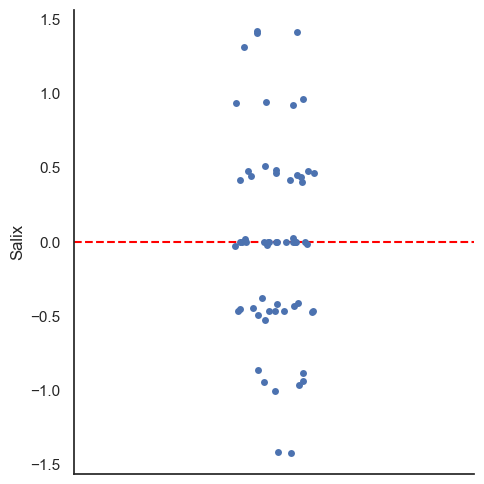

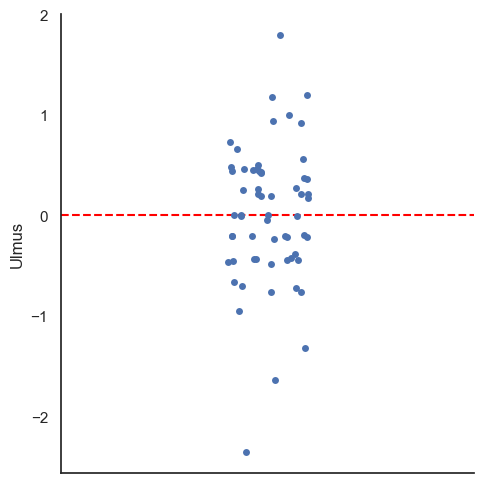

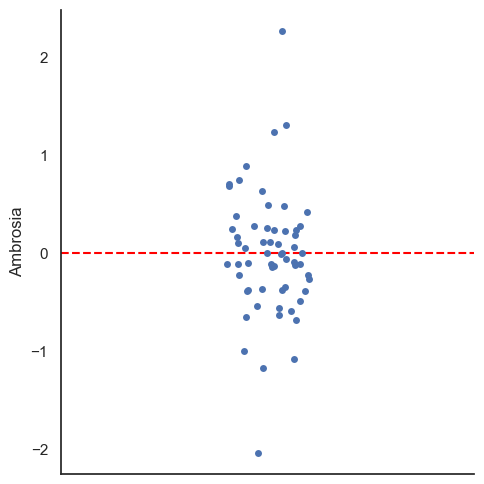

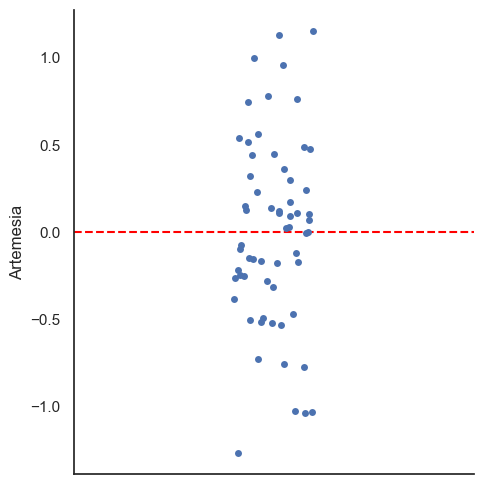

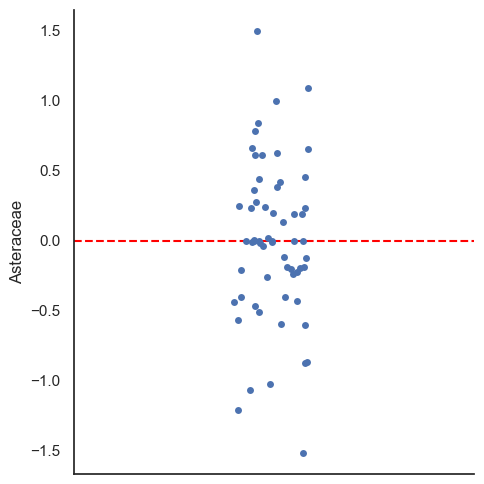

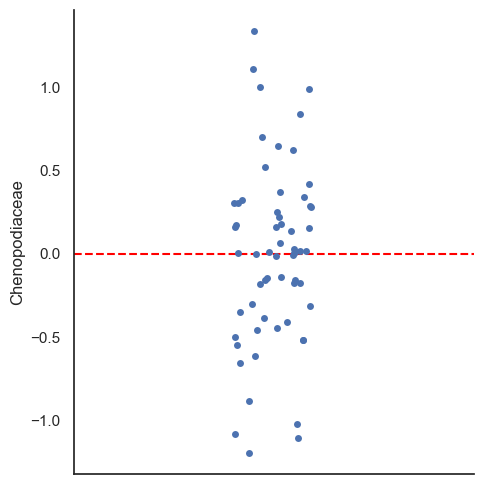

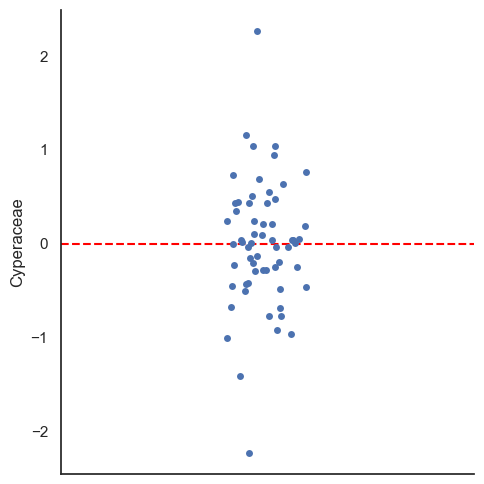

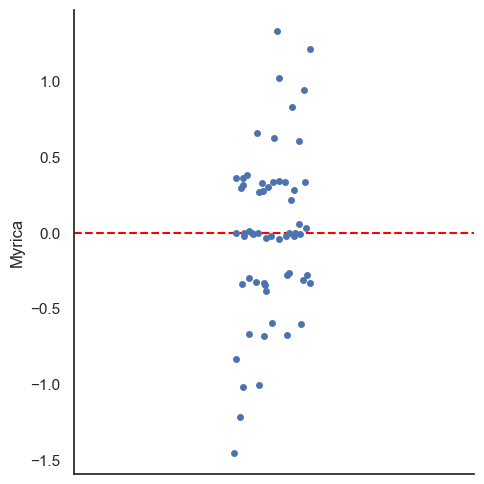

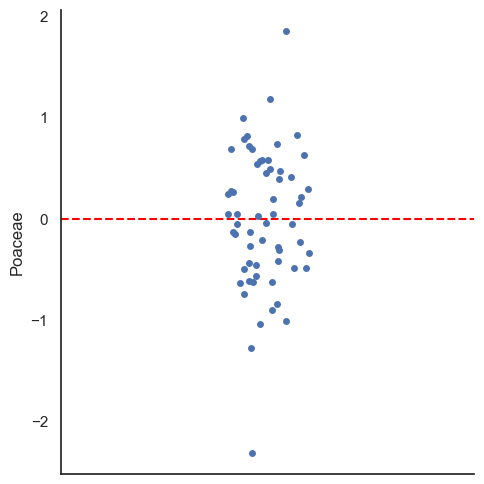

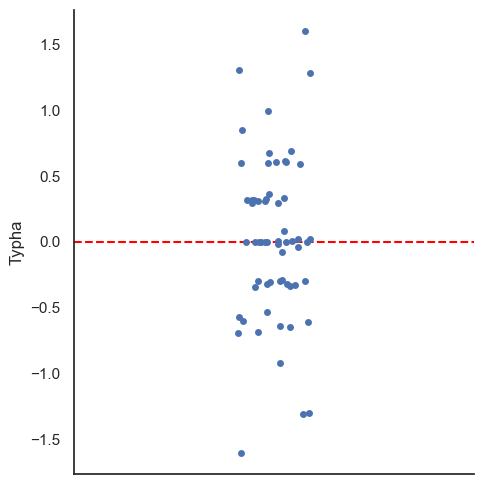

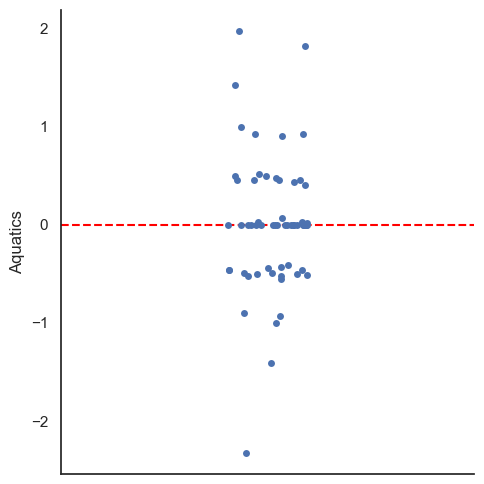

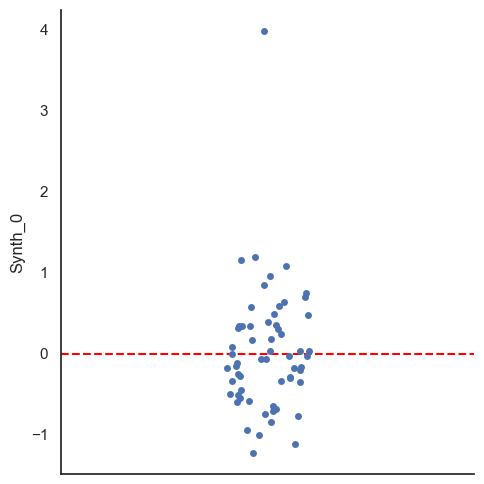

In [11]:
import seaborn as sns

for col in discretization:
    g = sns.catplot(df, y=col)
    for lvl in discretization[col]:
        g.refline(y=lvl, color='red', linestyle='--', label='Threshold')